#En este documento analizaremos un dataset con la informacion recopilada de distintos paises del mundo en el año 2023

In [ ]:
#importamos lobrerias
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#carga el archivo con la ruta en la que lo almacenas
data = pd.read_csv("/content/sample_data/world-data-2023.csv")

In [ ]:
data.head()

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60,AF,58.10%,"652,230","323,000",32.49,93.0,Kabul,"8,672",...,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273",33.939110,67.709953
1,Albania,105,AL,43.10%,"28,748","9,000",11.78,355.0,Tirana,"4,536",...,56.90%,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593",41.153332,20.168331
2,Algeria,18,DZ,17.40%,"2,381,741","317,000",24.28,213.0,Algiers,"150,006",...,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100",28.033886,1.659626
3,Andorra,164,AD,40.00%,468,NaN,7.20,376.0,Andorra la Vella,469,...,36.40%,3.33,"77,142",NaN,NaN,NaN,NaN,"67,873",42.506285,1.521801
4,Angola,26,AO,47.50%,"1,246,700","117,000",40.73,244.0,Luanda,"34,693",...,33.40%,0.21,"31,825,295",77.50%,9.20%,49.10%,6.89%,"21,061,025",-11.202692,17.873887


podemos ver en el head que hay columans con simbolos y comas ", " en sus columnas lo cual deberemos liompiar

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 35 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Country                                    195 non-null    object 
 1   Density
(P/Km2)                            195 non-null    object 
 2   Abbreviation                               188 non-null    object 
 3   Agricultural Land( %)                      188 non-null    object 
 4   Land Area(Km2)                             194 non-null    object 
 5   Armed Forces size                          171 non-null    object 
 6   Birth Rate                                 189 non-null    float64
 7   Calling Code                               194 non-null    float64
 8   Capital/Major City                         192 non-null    object 
 9   Co2-Emissions                              188 non-null    object 
 10  CPI                       

Observamos que hay varias columnas con el tipo de datos "Object" que podrían contener valores numéricos. Esto podría indicar que hay caracteres adicionales en esos campos, como símbolos de porcentaje o comas, que impiden que se reconozcan como números. Podemos limpiar y transformar estos datos según sea necesario para el análisis.

In [ ]:
#seleccionamos las columans a convertir y limpiar(son 20 columnas)
columnas_convertir_limpiar = [
    'Density\n(P/Km2)', 'Agricultural Land( %)', 'Land Area(Km2)',
    'Armed Forces size', 'Co2-Emissions', 'CPI', 'CPI Change (%)',
    'Minimum wage', 'Out of pocket health expenditure', 'Population',
    'Population: Labor force participation (%)', 'Tax revenue (%)',
    'Total tax rate', 'Unemployment rate', 'Urban_population',
    'Forested Area (%)', 'Gasoline Price', 'GDP',
    'Gross primary education enrollment (%)', 'Gross tertiary education enrollment (%)'
]

In [ ]:
#limpiamos y convertimos las columnas, convertimos ($,',', % en ' ')
for column in columnas_convertir_limpiar:
    if data[column].dtype == 'object':
        data[column] = data[column].str.replace('%', '', regex=False).str.replace(',', '', regex=False).str.replace('$', '', regex=False).astype(float)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 35 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Country                                    195 non-null    object 
 1   Density
(P/Km2)                            195 non-null    float64
 2   Abbreviation                               188 non-null    object 
 3   Agricultural Land( %)                      188 non-null    float64
 4   Land Area(Km2)                             194 non-null    float64
 5   Armed Forces size                          171 non-null    float64
 6   Birth Rate                                 189 non-null    float64
 7   Calling Code                               194 non-null    float64
 8   Capital/Major City                         192 non-null    object 
 9   Co2-Emissions                              188 non-null    float64
 10  CPI                       

observamos que hay muchos valores  nulos en el datset
procedemos alimpar los valores

In [ ]:
#seleccionamos solo las columnas numéricas
numeric_data_with_additional = data.select_dtypes(include=['float64'])
#usamos un estimador simpleimputer que se utiliza para completar los valores faltantes en los conjuntos de datos con la media en este caso
imputer = SimpleImputer(strategy='mean')
numeric_data_with_additional_imputed = imputer.fit_transform(numeric_data_with_additional)


#PCA

#ahora realizaremos un pca para reducir las dimensiones del dataset

In [ ]:
# procedemos a normalizar las coliumans con (media = 0, desviación estándar = 1)
scaler = StandardScaler()
scaled_data_with_additional = scaler.fit_transform(numeric_data_with_additional_imputed)

In [ ]:
#ajustamos el modelo con el pca
pca_with_additional = PCA()#usamos el metodo PCA() para reducir las dimensiones
pca_result_with_additional = pca_with_additional.fit_transform(scaled_data_with_additional)#ajustamos el modelo

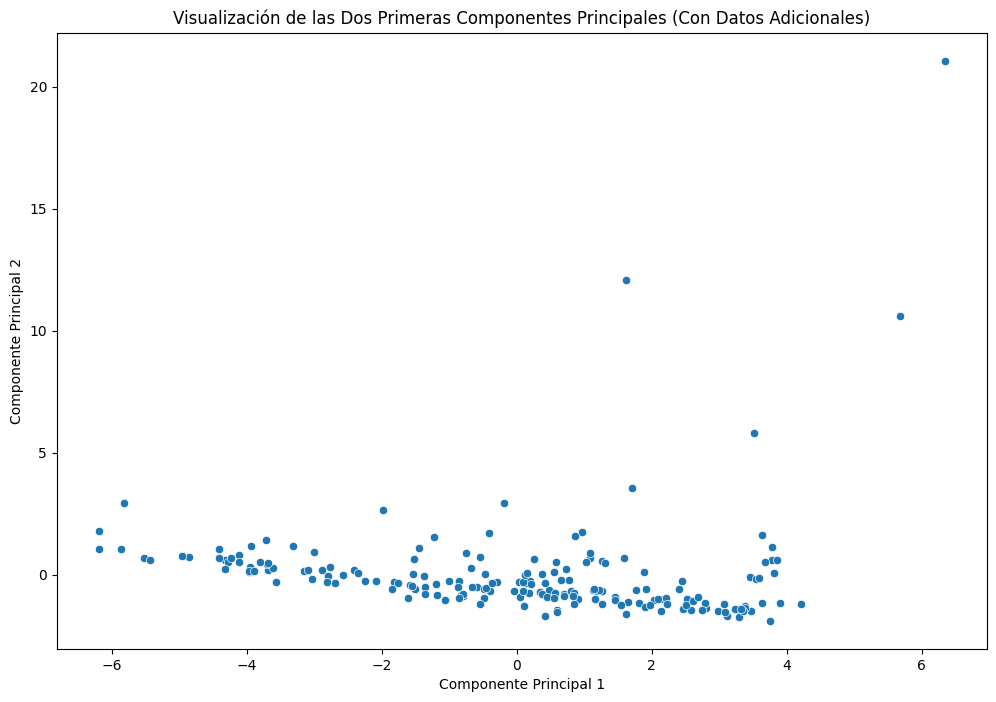

In [ ]:
#usaremos las dos primeras componentes principales para la visualización
pca_2d_with_additional = pca_result_with_additional[:, :2]
pca_2d_df_with_additional = pd.DataFrame(pca_2d_with_additional, columns=['Componente Principal 1', 'Componente Principal 2'])
pca_2d_df_with_additional['País'] = data['Country']
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Componente Principal 1', y='Componente Principal 2', data=pca_2d_df_with_additional)
plt.title('Visualización de las Dos Primeras Componentes Principales (Con Datos Adicionales)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

In [ ]:
feature_loadings = pd.DataFrame(pca_with_additional.components_[:2], columns=numeric_data_with_additional.columns).T
feature_loadings.columns = ['Componente Principal 1', 'Componente Principal 2']

In [ ]:
#ordenamos las características por su carga en la primera componente principal de mayor a menor
feature_loadings_sorted_by_cp1 = feature_loadings.sort_values(by='Componente Principal 1', ascending=False)

In [ ]:
#mostramos las 10 características más importantes para cada componente principal
top_features_cp1 = feature_loadings_sorted_by_cp1.head(10)
bottom_features_cp1 = feature_loadings_sorted_by_cp1.tail(10)

In [ ]:
print(top_features_cp1)
print(bottom_features_cp1)

                                         Componente Principal 1  \
Life expectancy                                        0.354822   
Gross tertiary education enrollment (%)                0.302164   
Physicians per thousand                                0.293189   
Minimum wage                                           0.211874   
Latitude                                               0.203290   
Tax revenue (%)                                        0.146465   
GDP                                                    0.130434   
Co2-Emissions                                          0.116972   
Gasoline Price                                         0.099633   
Urban_population                                       0.091682   

                                         Componente Principal 2  
Life expectancy                                       -0.075268  
Gross tertiary education enrollment (%)               -0.016860  
Physicians per thousand                               -0.077076 

Resumen:
La Componente Principal 1 en nuestro análisis de PCA ha revelado patrones significativos en los datos. Las características con cargas positivas, como "Esperanza de vida" y "Inscripción en educación terciaria", sugieren una fuerte asociación con el bienestar y el desarrollo en los países. Por otro lado, las características con cargas negativas, como "Tasa de mortalidad infantil" y "Tasa de fertilidad", ofrecen una perspectiva complementaria, posiblemente reflejando desafíos en la salud y el desarrollo.

Esta componente principal parece capturar una dimensión fundamental en nuestro conjunto de datos, posiblemente representando una medida del nivel de desarrollo y bienestar.

#Clustering

realizaremos un análisis de clustering para identificar grupos de objetos similares en los datos.
Usaremos K-means para agrupar países según sus características similares, utilizando las componentes principales que hemos obtenido.

In [ ]:
#determinamos el N° de clusters con el metodo 'codo' Vamos a ejecutar el
#método K-means para diferentes valores K y calcular la suma de las distancias al cuadrado
#dentro de los clusters, luego, graficaremos estos valores para encontrar el 'codo',
#que es el punto donde agregar otro cluster ya no proporciona una mejora significativa.
K_range = range(1, 11)
inertia = []
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_result_with_additional)
    inertia.append(kmeans.inertia_)

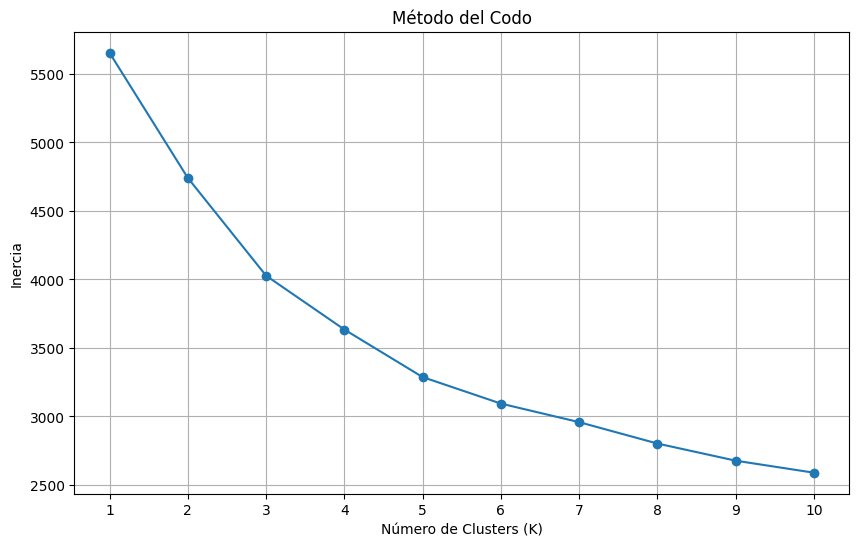

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertia, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inercia')
plt.xticks(K_range)
plt.grid(True)
plt.show()

podemos ver que tenemos iun valor optimo con K= 3, o K= 4

In [ ]:
#aplicamos K-means con K=4
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(pca_result_with_additional)

In [ ]:
#agregamos los clusters como columna qal datset original
data['Cluster'] = clusters

In [ ]:
data.head(2)

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,...,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude,Cluster
0,Afghanistan,60.0,AF,58.1,652230.0,323000.0,32.49,93.0,Kabul,8672.0,...,0.28,38041754.0,48.9,9.3,71.4,11.12,9797273.0,33.939110,67.709953,1
1,Albania,105.0,AL,43.1,28748.0,9000.0,11.78,355.0,Tirana,4536.0,...,1.20,2854191.0,55.7,18.6,36.6,12.33,1747593.0,41.153332,20.168331,2


In [ ]:
#estadísticas descriptivas para cada cluster
cluster_summary = data.groupby('Cluster').mean()

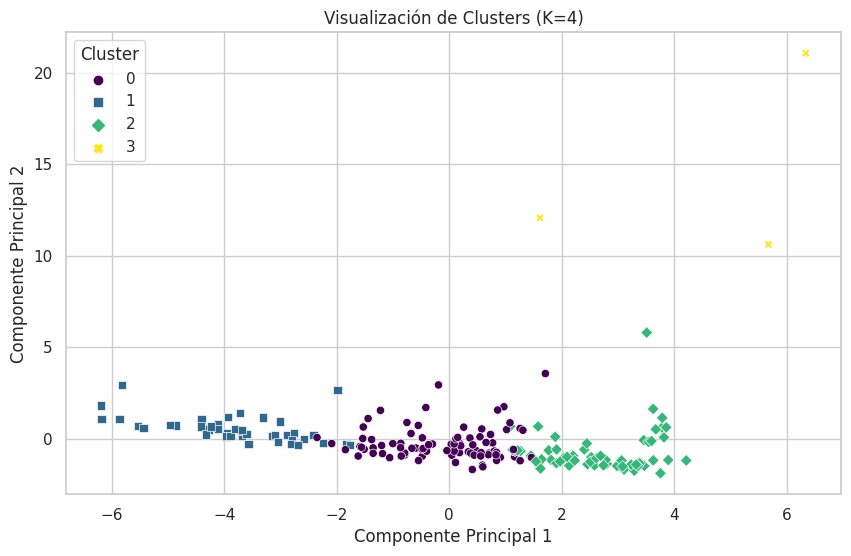

In [ ]:
pca_df = pd.DataFrame({
    'Componente Principal 1': pca_result_with_additional[:, 0],
    'Componente Principal 2': pca_result_with_additional[:, 1],
    'Cluster': clusters
})
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Componente Principal 1', y='Componente Principal 2', hue='Cluster', style='Cluster', palette='viridis', markers=['o', 's', 'D', 'X'], data=pca_df)
plt.title('Visualización de Clusters (K=4)')
plt.show()

In [ ]:
cluster_number = 0
countries_in_cluster = data[data['Cluster'] == cluster_number]['Country']
print(f"Los países en el cluster {cluster_number} son:")
print(countries_in_cluster.tolist())

Los países en el cluster 0 son:
['Algeria', 'Antigua and Barbuda', 'Azerbaijan', 'The Bahamas', 'Bahrain', 'Bangladesh', 'Belize', 'Bhutan', 'Bolivia', 'Botswana', 'Brazil', 'Brunei', 'Cape Verde', 'Cambodia', 'Colombia', 'Costa Rica', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Eswatini', 'Fiji', 'Gabon', 'Guatemala', 'Guyana', 'Vatican City', 'Honduras', 'Indonesia', 'Iran', 'Iraq', 'Jamaica', 'Jordan', 'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Lebanon', 'Libya', 'Malaysia', 'Mauritius', 'Mexico', 'Federated States of Micronesia', 'Mongolia', 'Morocco', 'Myanmar', 'Namibia', 'Nauru', 'Nepal', 'Nicaragua', 'North Korea', 'North Macedonia', 'Oman', 'Palau', 'Palestinian National Authority', 'Panama', 'Papua New Guinea', 'Paraguay', 'Peru', 'Philippines', 'Qatar', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Samoa', 'S�����������', 'Saudi Arabia', 'Seychelles', 'Solomon Islands', 'South Africa', 'Sri Lanka', 'Suriname', 'Syria', 'Tajikis

In [ ]:
cluster_number = 1
countries_in_cluster = data[data['Cluster'] == cluster_number]['Country']
print(f"Los países en el cluster {cluster_number} son:")
print(countries_in_cluster.tolist())

Los países en el cluster 1 son:
['Afghanistan', 'Angola', 'Benin', 'Burkina Faso', 'Burundi', 'Ivory Coast', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Republic of the Congo', 'Democratic Republic of the Congo', 'Djibouti', 'Equatorial Guinea', 'Eritrea', 'Ethiopia', 'The Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Haiti', 'Kenya', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Marshall Islands', 'Mauritania', 'Mozambique', 'Niger', 'Nigeria', 'Pakistan', 'Rwanda', 'Senegal', 'Sierra Leone', 'Somalia', 'South Sudan', 'Sudan', 'Tanzania', 'Togo', 'Uganda', 'Zambia', 'Zimbabwe']


In [ ]:
cluster_number = 2
countries_in_cluster = data[data['Cluster'] == cluster_number]['Country']
print(f"Los países en el cluster {cluster_number} son:")
print(countries_in_cluster.tolist())

Los países en el cluster 2 son:
['Albania', 'Andorra', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Barbados', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Canada', 'Chile', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Grenada', 'Hungary', 'Iceland', 'Republic of Ireland', 'Israel', 'Italy', 'Japan', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Maldives', 'Malta', 'Moldova', 'Monaco', 'Montenegro', 'Netherlands', 'New Zealand', 'Norway', 'Poland', 'Portugal', 'Romania', 'Russia', 'Saint Kitts and Nevis', 'San Marino', 'Serbia', 'Singapore', 'Slovakia', 'Slovenia', 'South Korea', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'Ukraine', 'United Kingdom', 'Uruguay']


In [ ]:
cluster_number = 3
countries_in_cluster = data[data['Cluster'] == cluster_number]['Country']
print(f"Los países en el cluster {cluster_number} son:")
print(countries_in_cluster.tolist())

Los países en el cluster 3 son:
['China', 'India', 'United States']


#EDA

In [ ]:
#resumen estadístico
statistical_summary = data.describe().T

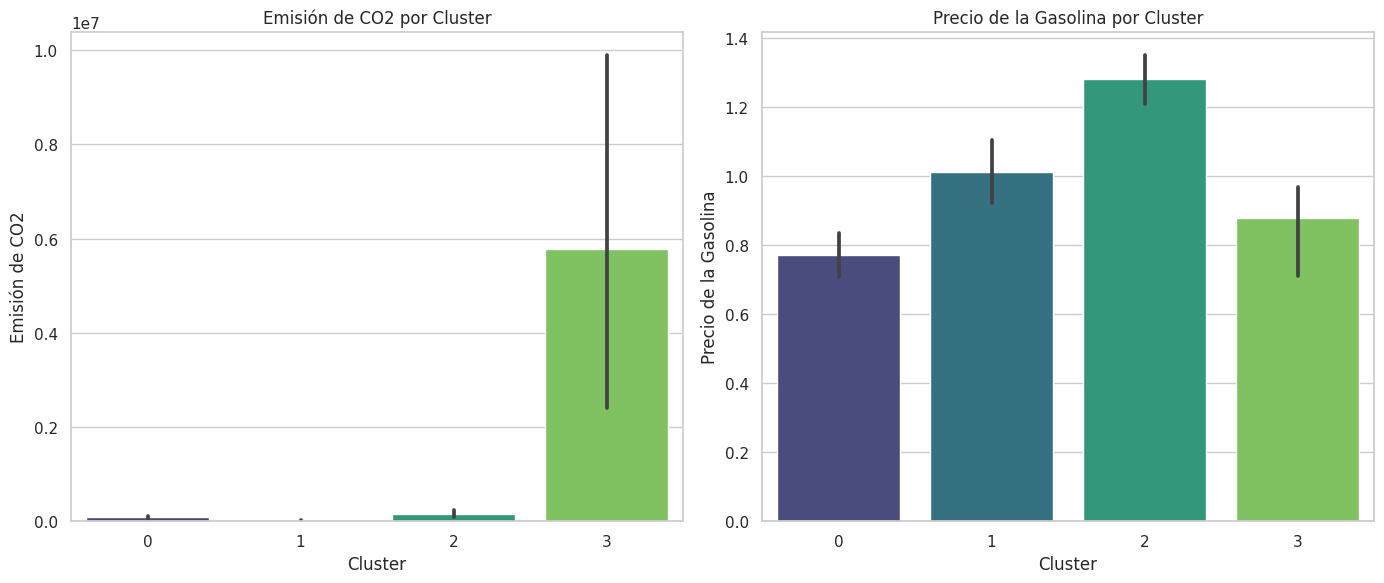

In [ ]:
# Gráfico de barras para comparar características entre clusters
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='Cluster', y='Co2-Emissions', data=data, palette='viridis')
plt.title('Emisión de CO2 por Cluster')
plt.ylabel('Emisión de CO2')
plt.xlabel('Cluster')
plt.subplot(1, 2, 2)
sns.barplot(x='Cluster', y='Gasoline Price', data=data, palette='viridis')
plt.title('Precio de la Gasolina por Cluster')
plt.ylabel('Precio de la Gasolina')
plt.xlabel('Cluster')
plt.tight_layout()
plt.show()

Estas diferencias pueden reflejar las variaciones económicas, industriales y políticas entre los clusters.

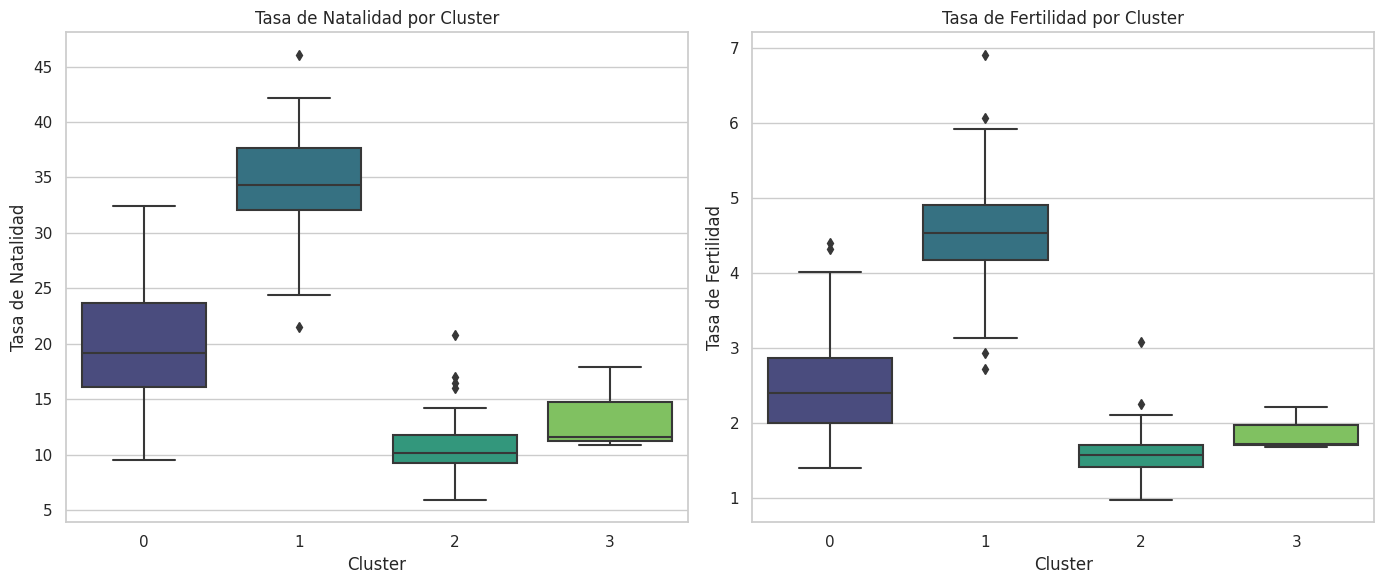

In [ ]:
# Gráfico de caja para comparar características entre clusters
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='Cluster', y='Birth Rate', data=data, palette='viridis')
plt.title('Tasa de Natalidad por Cluster')
plt.ylabel('Tasa de Natalidad')
plt.xlabel('Cluster')
plt.subplot(1, 2, 2)
sns.boxplot(x='Cluster', y='Fertility Rate', data=data, palette='viridis')
plt.title('Tasa de Fertilidad por Cluster')
plt.ylabel('Tasa de Fertilidad')
plt.xlabel('Cluster')
plt.tight_layout()
plt.show()

Estas diferencias pueden reflejar variaciones en la estructura demográfica, las políticas familiares y los niveles de desarrollo entre los clusters.

matriz de correlaciones

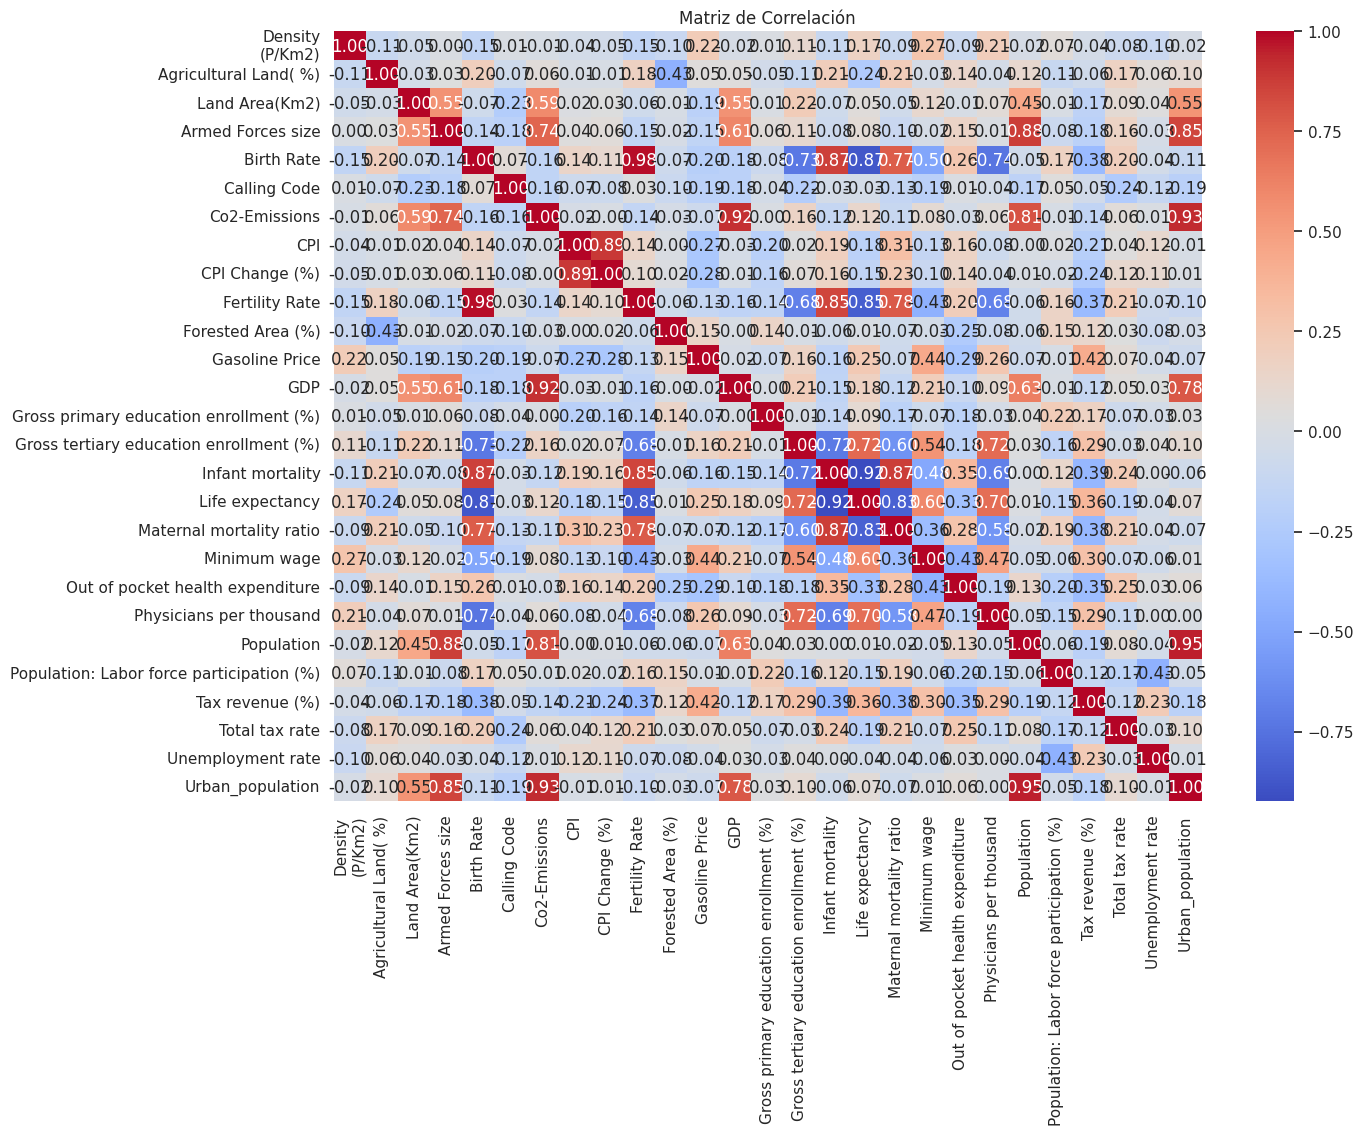

In [ ]:
#exclimos las columnas de latitud y longitud de la matriz de correlación
correlation_matrix = data.drop(columns=['Latitude', 'Longitude']).select_dtypes(include=['float64']).corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

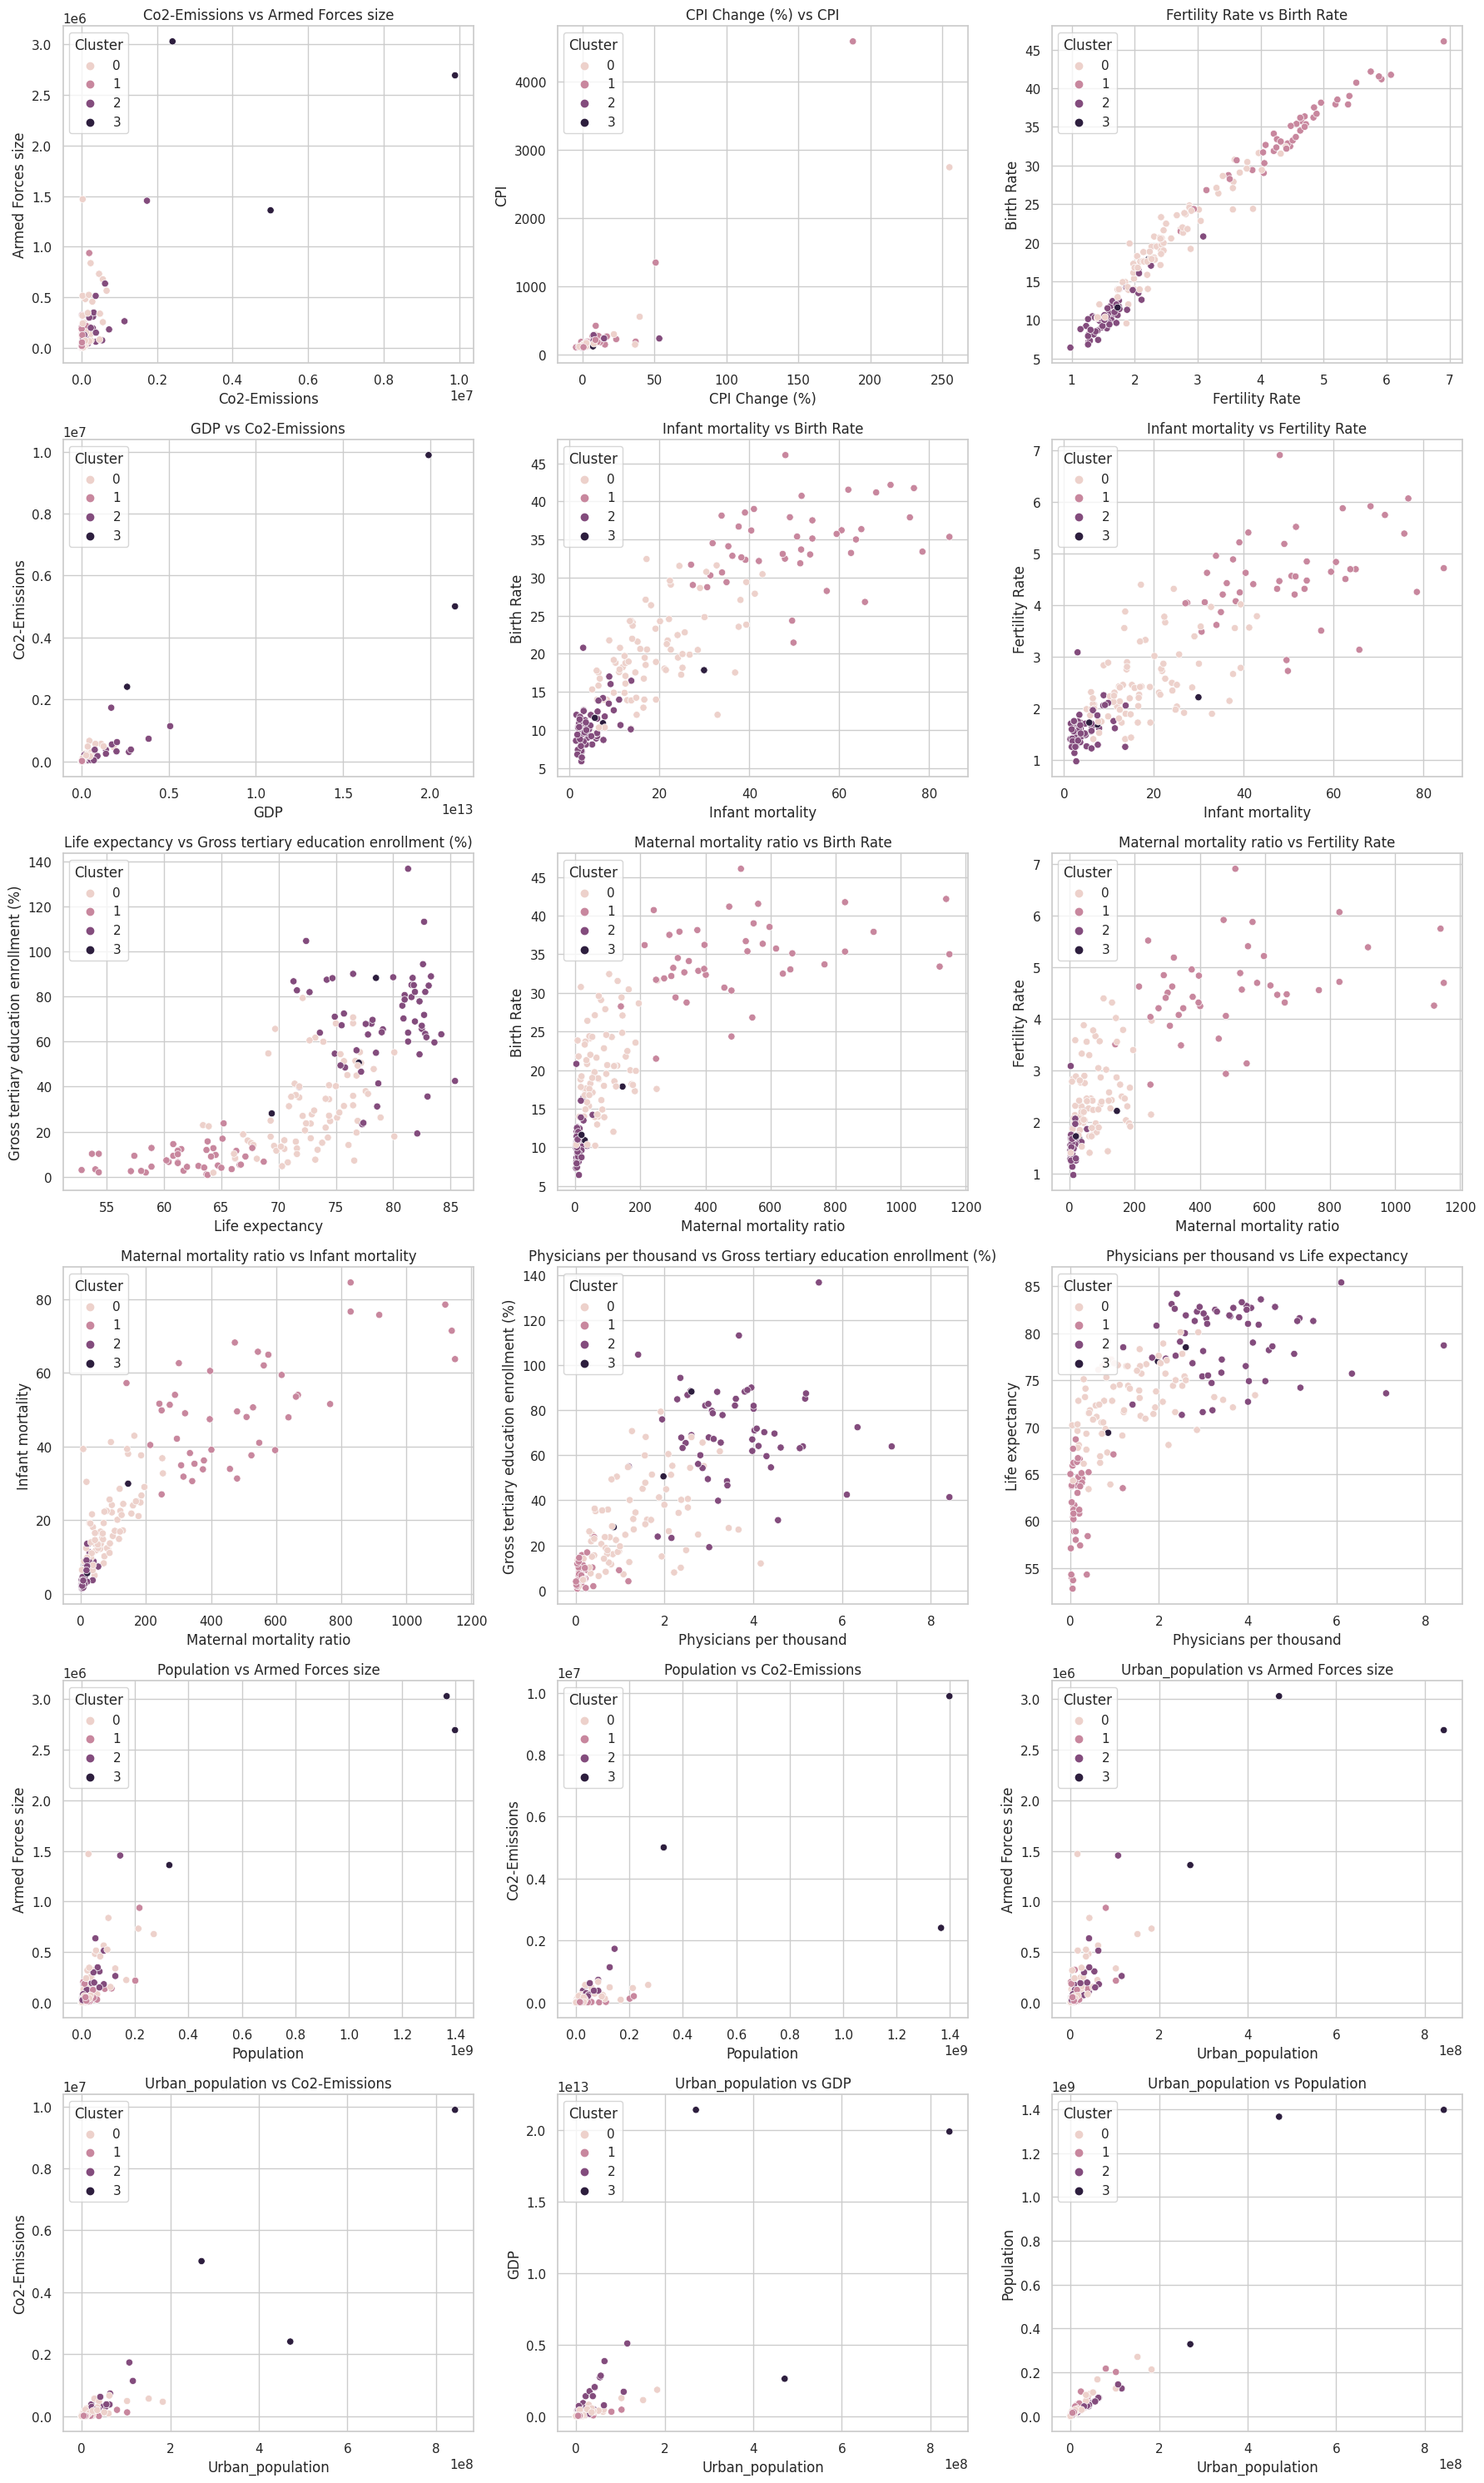

In [ ]:
# determinamos el número de filas y columnas necesarias en función del número de pares de correlación fuerte
num_rows = int(len(strong_correlation_pairs) / 3) + (len(strong_correlation_pairs) % 3 > 0)
num_cols = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 5 * num_rows))
axes_flat = axes.flatten() if num_rows > 1 else axes #aplanamos los ejes para facilitar la iteración

#iteramos sobre los pares de características fuertemente correlacionadas
for i, (feature1, feature2) in enumerate(strong_correlation_pairs):
    sns.scatterplot(x=feature1, y=feature2, hue='Cluster', data=data, ax=axes_flat[i])
    axes_flat[i].set_title(f'{feature1} vs {feature2}')
    axes_flat[i].legend(title='Cluster', loc='upper left')

for i in range(len(strong_correlation_pairs), num_rows * num_cols):#eliminamos los ejes adicionales si hay más subparcelas que gráficos
    fig.delaxes(axes_flat[i])
plt.tight_layout()
plt.show()

#interpretación de los clusteres

primeros veremos distintas visualizaciones para encontrar las caractericticas ams importantes en cada grupo, para esto usaremos las caracteriticas mas representativas

In [ ]:
cluster_means = data.groupby('Cluster').mean()#media de cada cluster
std_deviation = cluster_means.std()#desv estand de medias entre clusters
mean_of_means = cluster_means.mean()#la media de las medias entre los clusters
feature_variation = std_deviation / mean_of_means#variación relativa como la desviación estándar dividida por la media de medias

top_features = feature_variation.nlargest(5)#seleccionamos las 5 características con la mayor variación relativa
print(top_features)

Co2-Emissions        1.891778
GDP                  1.871932
Population           1.823721
Urban_population     1.805720
Armed Forces size    1.666659
dtype: float64


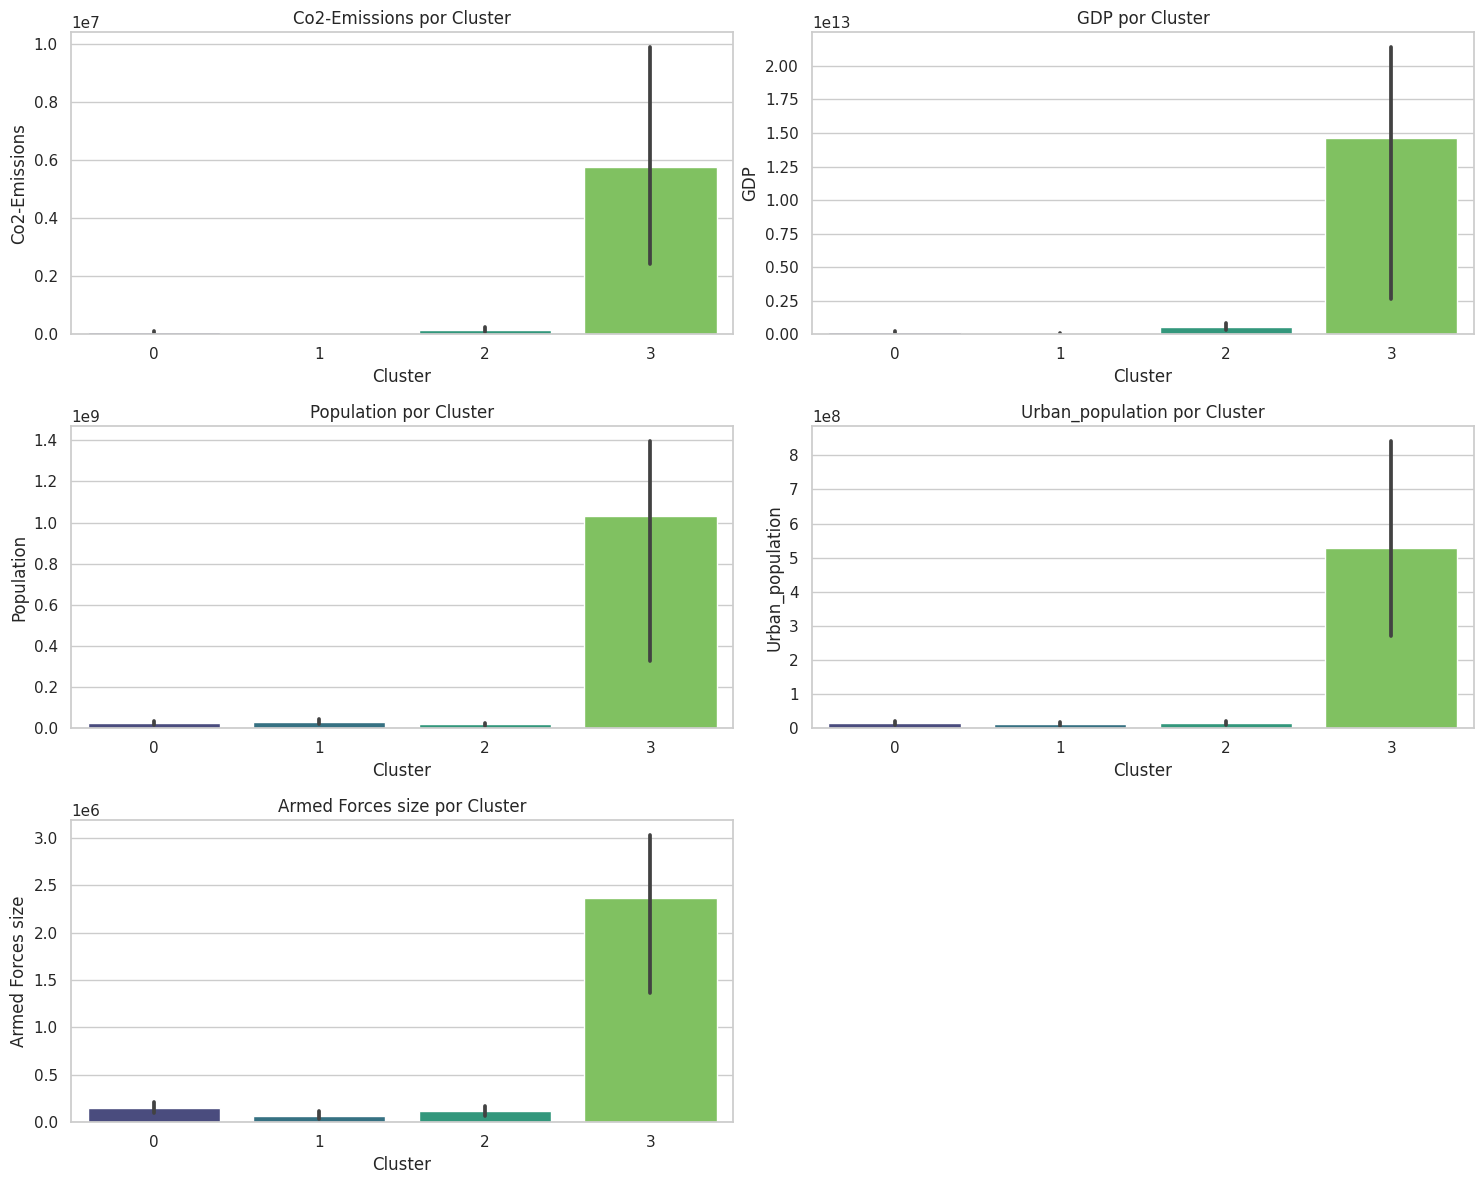

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
axes_flat = axes.flatten()

for i, feature in enumerate(top_features.index):
    sns.barplot(x='Cluster', y=feature, data=data, ax=axes_flat[i], palette='viridis')
    axes_flat[i].set_title(f'{feature} por Cluster')
    axes_flat[i].set_ylabel(feature)
    axes_flat[i].set_xlabel('Cluster')

fig.delaxes(axes_flat[-1])
plt.tight_layout()
plt.show()

Los gráficos de barras anteriores muestran la media de las cinco características con la mayor variación relativa en cada uno de los cuatro clusters. Estas visualizaciones ofrecen una vista clara de cómo estas características clave diferencian los clusters:

Podemos interpretar los clusters de la siguiente manera:

Cluster 0: Países con economías medianas, emisiones moderadas de CO2, y fuerzas armadas relativamente grandes.
Cluster 1: Países más pequeños en términos de economía y fuerzas armadas, con bajas emisiones de CO2.
Cluster 2: Países con economías considerablemente grandes pero no tan grandes como el Cluster 3, emisiones moderadas de CO2.
Cluster 3: Países gigantes en términos de PIB, población, población urbana, y fuerzas armadas; emisiones de CO2 extremadamente altas.
Podemos asignar etiquetas descriptivas a cada cluster basadas en estas interpretaciones:

Cluster 0: "Economías Medianas"
Cluster 1: "Economías Menores"
Cluster 2: "Economías Emergentes"
Cluster 3: "Superpotencias Económicas"

estos insights podrían tener podrían tener aplicaciones prácticas en:
1. Política y Gobierno:
Ayuda Internacional: Identificar a los países que necesitan más ayuda en áreas como la reducción de emisiones de CO2, el desarrollo económico, o la urbanización.
Relaciones Diplomáticas: Entender cómo los países están agrupados puede ayudar a formar alianzas y acuerdos comerciales, especialmente con países con características similares.
2. Negocios e Inversiones:
Estrategia de Mercado: Las empresas pueden utilizar esta información para planificar su expansión en nuevos mercados, entendiendo las economías y características demográficas.
Inversiones: Los inversores pueden usar estos grupos para identificar oportunidades de inversión en países emergentes o en economías estables y grandes.
3. Salud y Educación:
Programas de Salud: Los organismos de salud pueden dirigir recursos y programas hacia los países que muestran necesidades específicas en términos de población y urbanización.
Educación: Los insights sobre la educación primaria y terciaria pueden guiar las inversiones en educación y los intercambios culturales y académicos.
4. Medio Ambiente:
Sostenibilidad: Los organismos medioambientales pueden dirigir esfuerzos de conservación y sostenibilidad hacia países con altas emisiones de CO2 y grandes áreas urbanas.
5. Defensa y Seguridad:
Alianzas Militares: Entender el tamaño y la capacidad de las fuerzas armadas puede guiar las decisiones de defensa, alianzas militares y acuerdos de paz.
En resumen, estos insights pueden guiar decisiones en una variedad de campos, desde la política y los negocios hasta la salud y el medio ambiente. La interpretación y aplicación de estos insights deben hacerse en colaboración con expertos en el área de interés para garantizar que se utilicen de manera ética y efectiva.

Aplicar los insights obtenidos en el contexto de la educación puede ofrecer una variedad de oportunidades para mejorar los sistemas educativos, identificar necesidades, y fomentar la colaboración internacional.
1. Identificación de Necesidades Educativas:
Cluster 3 (Superpotencias Económicas): Pueden tener sistemas educativos avanzados y recursos para invertir en educación terciaria y tecnología.
Cluster 0 y 2 (Economías Medianas y Emergentes): Pueden tener necesidades mixtas, con oportunidades para mejorar tanto la educación primaria como la terciaria.
Cluster 1 (Economías Menores): Pueden tener necesidades en la educación primaria y en la formación de docentes.
2. Colaboración y Alianzas Internacionales:
Entre Clusters Similares: Los países dentro de un mismo cluster pueden colaborar en programas educativos, compartiendo recursos y conocimientos.
Entre Clusters Diferentes: Los países de clusters con sistemas educativos más avanzados pueden ofrecer apoyo, formación y recursos a los de clusters con necesidades mayores.
3. Inversiones y Financiamiento:
Enfoque en la Educación Primaria: Para los países en clusters con bajos niveles de inscripción en la educación primaria, la inversión en infraestructura escolar y formación de docentes puede ser clave.
Fomento de la Educación Terciaria: Para los países en clusters con economías emergentes o grandes, la inversión en universidades y tecnología educativa puede impulsar la innovación y el crecimiento económico.
4. Políticas y Reformas Educativas:
Análisis Comparativo: Utilizar los datos para comparar políticas y prácticas educativas entre países similares y diferentes, identificando mejores prácticas.
Reformas a Medida: Diseñar reformas educativas que se ajusten a las características y necesidades de cada cluster, considerando factores como la economía, la urbanización y la población.
5. Programas de Intercambio y Movilidad:
Fomentar Intercambios: Establecer programas de intercambio entre países dentro y entre clusters, fomentando la diversidad y el aprendizaje intercultural.
Conclusión:
La aplicación de estos insights en el contexto de la educación requiere una colaboración estrecha con educadores, legisladores y otros expertos en el campo. La información puede ser una herramienta poderosa para informar decisiones y diseñar intervenciones que mejoren la calidad y el acceso a la educación en diferentes contextos nacionales.